In [ ]:
import numpy as np
from scipy.linalg import sqrtm, inv

In [ ]:
def get_synthetic_data(n, d, r, scale):
  '''
  return:
  X of shape (n, d)
  Y of shape (n,)
  UZ of shape (d, r)
  Sigma of shape (d, d)
  '''

  UZ = np.random.randn(d, r)
  s1 = np.diag((np.arange(r, 0, -1))**scale)
  SigmaZ = UZ @ s1 @ UZ.T

  SigmaX = np.eye(d)
  X = np.random.randn(n, d) @ np.sqrt(SigmaX)
  Y = np.sum((X @ SigmaZ) * X, axis=1)

  return X, Y, UZ, SigmaZ, s1

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
mean = [0, 0]

cov = [[1, 0], [0, 100]]
np.random.multivariate_normal(mean, cov, 5).shape

(5, 2)

In [ ]:
kek = np.array([[1, 2], [3, 4]])
print(kek)
kek = kek.reshape(-1, order='F')
print(kek)
kek = kek.reshape((2, 2), order='F')
print(kek)

[[1 2]
 [3 4]]
[1 3 2 4]
[[1 2]
 [3 4]]


In [ ]:
def generate_reg_data(q, p, N, K_sum):
  theta_true = np.random.randn(p, q)
  A_list = [np.random.randn(q, q) for k in range(K_sum)]
  B_list = [np.random.randn(p, p) for k in range(K_sum)]
  sigma_true = np.zeros((p * q, p * q))
  for k in range(K_sum):
    A = A_list[k]
    B = B_list[k]
    sigma_true += np.kron(A @ A.T, B @ B.T)
  sigma_true /= K_sum

  X_samples = np.random.default_rng().multivariate_normal(np.zeros(p * q), sigma_true, N, check_valid="warn")
  #print(X_samples.shape)
  #print(X_samples.mean(axis=0))
  X = []
  y = []
  for i in range(N):
    #Z = np.random.randn(p, q)
    #A_sum = np.zeros((q, q))
    #B_sum = np.zeros((p, p))
    #for k in range(K_sum):
    #  A = A_list[k]
    #  B = B_list[k]
    #  A_sum += A
    #  B_sum += B
    #cur_X = B_sum @ Z @ A_sum.T
    cur_X = X_samples[i].reshape((p, q), order='F')

    X.append(cur_X)
    y.append(np.sum(X[-1] * theta_true))

  #xx = np.zeros((p * q, p * q))
  #x_mean = np.zeros(p * q)
  #for i in range(N):
  #  vec_x = X[i].reshape(-1, order='F')
  #  xx += (vec_x[:, None] @ vec_x[None, :])
  #  x_mean += vec_x
  #sigma_base = xx / N
  #x_mean /= N
  #print(x_mean)

  #xx = np.zeros((p * q, p * q))
  #for i in range(N):
  #  vec_x = X[i].reshape(-1, order='F') - x_mean
  #  xx += (vec_x[:, None] @ vec_x[None, :])
  #sigma_base2 = xx / (N - 1)

  #print(np.linalg.norm(sigma_base - sigma_true))
  #print(np.linalg.norm(sigma_base2 - sigma_true))

  return X, y, theta_true, sigma_true

In [ ]:
X, y, theta_true, sigma_true = generate_reg_data(4, 5, N=100000, K_sum=10)

(100000, 20)
[ 0.01392719  0.01823417 -0.02457357 -0.02276408 -0.02424414  0.01900799
  0.02295944  0.00549256  0.02278219  0.00667388  0.00212947 -0.01609479
  0.01231462 -0.02136538 -0.01526897 -0.00902882 -0.01295073 -0.00232699
  0.01476313 -0.01593354]


In [ ]:
test_A = np.kron(np.array([[1, 2], [3, 4]]), np.arange(9).reshape((3, 3)))
test_A

array([[ 0,  1,  2,  0,  2,  4],
       [ 3,  4,  5,  6,  8, 10],
       [ 6,  7,  8, 12, 14, 16],
       [ 0,  3,  6,  0,  4,  8],
       [ 9, 12, 15, 12, 16, 20],
       [18, 21, 24, 24, 28, 32]])

In [ ]:
def R_operator(A, p, q):
  B = np.zeros((p * p, q * q))
  for i in range(p):
    for j in range(p):
      M = A[i * q:(i + 1) * q, j * q:(j + 1) * q]
      B[j * p + i, :] = M.reshape(-1, order='F')
  return B

def R_inv_operator(B, p, q):
  A = np.zeros((p * q, p * q))
  for i in range(p):
    for j in range(p):
      M = B[j * p + i, :].reshape((q, q), order='F')
      A[i * q:(i + 1) * q, j * q:(j + 1) * q] = M
  return A

In [ ]:
test_B = R_operator(test_A, 2, 3)
print(test_B)
pred_A = R_inv_operator(test_B, 2, 3)
print(pred_A)
print(np.all(pred_A == test_A))

[[ 0.  3.  6.  1.  4.  7.  2.  5.  8.]
 [ 0.  9. 18.  3. 12. 21.  6. 15. 24.]
 [ 0.  6. 12.  2.  8. 14.  4. 10. 16.]
 [ 0. 12. 24.  4. 16. 28.  8. 20. 32.]]
[[ 0.  1.  2.  0.  2.  4.]
 [ 3.  4.  5.  6.  8. 10.]
 [ 6.  7.  8. 12. 14. 16.]
 [ 0.  3.  6.  0.  4.  8.]
 [ 9. 12. 15. 12. 16. 20.]
 [18. 21. 24. 24. 28. 32.]]
True


In [ ]:
kek = [np.ones((5, 6))]
print(kek)
print(kek[0].reshape(-1))
print(kek)

[array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
[array([[1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1.]])]


In [ ]:
def get_theta_by_sigma(X, y, lambd, sigma):
  p, q = X[0].shape
  N = len(X)
  xy = np.zeros((p * q))
  for i in range(N):
    xy += X[i].reshape(-1, order='F') * y[i]
  xy = xy / N

  inv_sigma = np.linalg.inv(sigma + lambd * np.eye(p * q))
  theta = inv_sigma @ xy
  #theta = np.linalg.inv(sigma + lambd * np.eye(p * q)) @ xy
  #print(np.allclose(np.dot(sigma, inv_sigma), np.eye(p * q)))
  return theta.reshape((p, q), order='F')


def predict_theta(X, y, lambd, K_sum=1):
  p, q = X[0].shape
  N = len(X)
  # стандартная оценка
  xx = np.zeros((p * q, p * q))
  for i in range(N):
    vec_x = X[i].reshape(-1, order='F')
    xx += (vec_x[:, None] @ vec_x[None, :])
  sigma_base = xx / N

  # модифицированная
  F1 = np.zeros((q, q))
  F2 = np.zeros((p, p))
  for i in range(N):
    F1 += X[i].T @ X[i]
    F2 += X[i] @ X[i].T
  F1_mean = F1 / N
  F2_mean = F2 / N

  norms = 0.0
  for i in range(N):
    norms += np.linalg.norm(X[i], 'fro')**2
  denom = norms / N
  sigma_modified = np.kron(F1_mean, F2_mean) / denom

  # модифицированная с суммой
  R_sigma_base = R_operator(sigma_base, p, q)
  U, S, Vh = np.linalg.svd(R_sigma_base, full_matrices=False)
  #print(U.shape, S.shape, Vh.shape)
  #print(S[:K_sum + 1])
  U = U[:, :K_sum]
  S = S[:K_sum]
  Vh = Vh[:K_sum, :]
  #print(U.shape, S.shape, Vh.shape)
  R_predict = np.dot((U * S), Vh)
  #print(np.linalg.norm(R_predict - R_sigma_base, ord=2))
  sigma_modified_sum = R_inv_operator(R_predict, p, q)

  # get theta
  theta_base = get_theta_by_sigma(X, y, lambd, sigma_base)
  theta_modified = get_theta_by_sigma(X, y, lambd, sigma_modified)
  theta_modified_sum = get_theta_by_sigma(X, y, lambd, sigma_modified_sum)
  return theta_base, theta_modified, theta_modified_sum, sigma_base, sigma_modified, sigma_modified_sum

In [ ]:
p = 5
q = 5
N = 50000
lambd = 0.0
K_sum = 10
X, y, theta_true, sigma_true = generate_reg_data(q, p, N, K_sum)

(50000, 25)
[ 0.00916746 -0.00956452  0.01605287 -0.01945105 -0.00301138  0.00653336
 -0.03478844  0.00302345 -0.03285931  0.01084574  0.01695469  0.0004344
  0.03157735  0.00275142 -0.00587661  0.056667   -0.00194731 -0.01820936
 -0.04823582  0.00964469 -0.01388993  0.02158882 -0.00736893  0.00852921
  0.01225126]


In [ ]:
theta_true_by_sigma = get_theta_by_sigma(X, y, lambd, sigma_true)

True


In [ ]:
theta_base, theta_modified, theta_modified_sum, sigma_base, sigma_modified, sigma_modified_sum = predict_theta(X, y, lambd, K_sum)

(25, 25) (25,) (25, 25)
[141.3461717   23.90566245  17.50885362  14.78209601  11.9122632
   7.91557418   5.40374988   4.84380699   3.29103689   1.73184711
   1.09204663]
(25, 10) (10,) (10, 25)
1.092046625803143
True
True
True


In [ ]:
print(np.linalg.norm(sigma_base - sigma_true))
print(np.linalg.norm(sigma_modified - sigma_true))
print(np.linalg.norm(sigma_modified_sum - sigma_true))
print()
print(np.linalg.norm(sigma_modified_sum - sigma_base))

3.103655603775192
36.95812640213519
2.4446551268226844

1.9177168107452238


In [ ]:
print(np.linalg.norm(theta_true_by_sigma - theta_true))
print(np.linalg.norm(theta_base - theta_true))
print(np.linalg.norm(theta_modified - theta_true))
print(np.linalg.norm(theta_modified_sum - theta_true))

0.1347386387674346
4.562882409754704e-14
1.554609007708581
0.1040683762266204


In [ ]:
print(theta_true)
print(theta_base)
print(theta_modified)
print(theta_modified_sum)
print(theta_true_by_sigma)

[[ 0.72011473 -0.46766325 -1.13122977 -0.36533553  1.32663673]
 [ 0.0921547   1.01597769 -0.02266041  0.70956558  1.2205303 ]
 [-0.33624608 -1.10921173  1.19005119  0.90047614 -2.50850291]
 [-2.20642381 -2.02417295  0.92194815 -0.14655733 -0.34029853]
 [ 0.26048836  0.56091813 -0.07513927 -0.39345553  1.3286497 ]]
[[ 0.72011473 -0.46766325 -1.13122977 -0.36533553  1.32663673]
 [ 0.0921547   1.01597769 -0.02266041  0.70956558  1.2205303 ]
 [-0.33624608 -1.10921173  1.19005119  0.90047614 -2.50850291]
 [-2.20642381 -2.02417295  0.92194815 -0.14655733 -0.34029853]
 [ 0.26048836  0.56091813 -0.07513927 -0.39345553  1.3286497 ]]
[[ 0.86485698 -1.07352974 -1.24577448 -0.12238504  0.79201169]
 [ 0.26119194  1.01234222 -0.26399158  0.13840451  1.18711836]
 [-0.56967487 -0.66164193  1.15802067  1.21923754 -2.63530559]
 [-1.90893661 -1.9890346   0.98769586  0.04073714 -0.4196883 ]
 [ 0.64984887  0.89039183 -0.08711801 -0.08148821  1.61399771]]
[[ 0.74052967 -0.4744746  -1.14333847 -0.40089822  1

In [ ]:
cut_ind = 4
print(sigma_true[:cut_ind, :cut_ind])
print(sigma_base[:cut_ind, :cut_ind])
print(sigma_modified[:cut_ind, :cut_ind])
print(sigma_modified_sum[:cut_ind, :cut_ind])

[[15.80100248  4.14638535  2.90334436  2.48541751]
 [ 4.14638535 21.33932457 -1.09687864 -2.1607062 ]
 [ 2.90334436 -1.09687864 16.11848693 -3.53994968]
 [ 2.48541751 -2.1607062  -3.53994968 20.51773301]]
[[15.69189791  4.05005911  2.9322458   2.51210673]
 [ 4.05005911 21.35176578 -1.2161712  -2.10985723]
 [ 2.9322458  -1.2161712  16.10857087 -3.3550272 ]
 [ 2.51210673 -2.10985723 -3.3550272  20.45846651]]
[[15.80206468  4.47905827  3.11659142  3.01159017]
 [ 4.47905827 21.54216478 -0.60737853 -1.81236405]
 [ 3.11659142 -0.60737853 16.30890982 -1.88218794]
 [ 3.01159017 -1.81236405 -1.88218794 19.99788659]]
[[15.77545933  4.03512841  2.99875335  2.46233912]
 [ 4.03512841 21.36762747 -1.21886661 -2.14587661]
 [ 2.99875335 -1.21886661 16.15323432 -3.33581905]
 [ 2.46233912 -2.14587661 -3.33581905 20.49144605]]


[1, 5, 10, 30, 50, 70, 90]
0
1
2
3
4
5
6


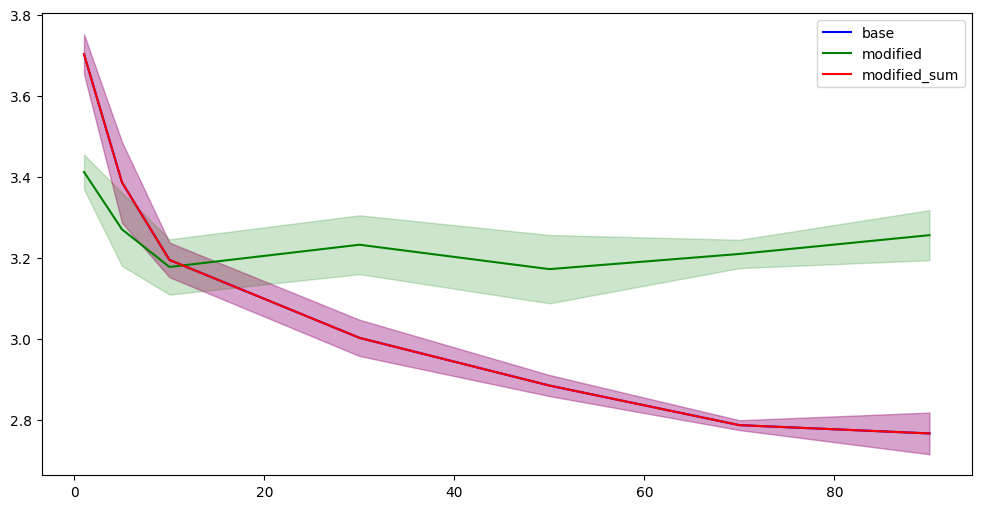

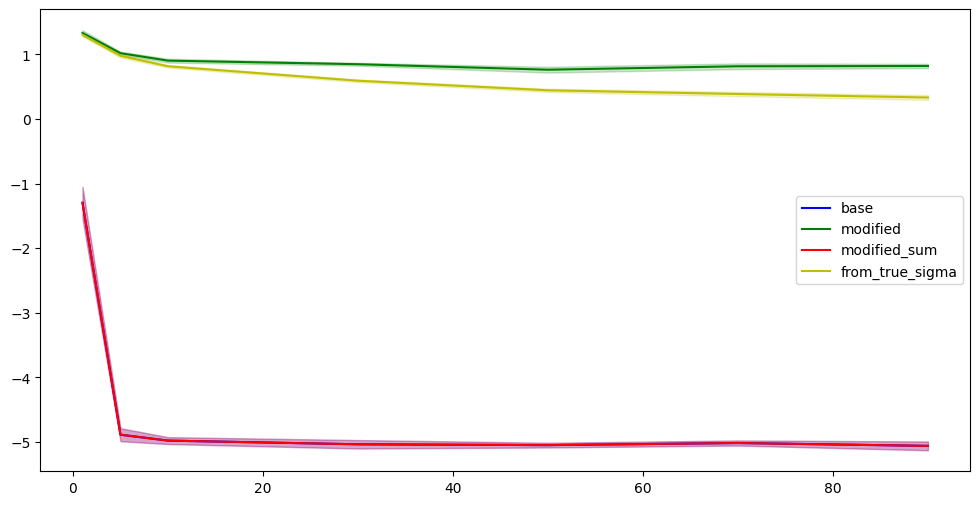

In [ ]:
import matplotlib.pyplot as plt

samples = 5
lambd = 0.0001
N_coef_list = [1, 5] + list(range(10, 100 + 1, 20))
print(N_coef_list)

q = 100
p = 3
K_sum = 10


fro_norms = {
    "sigma": {},
    "theta": {}
}
N_cnt = len(N_coef_list)
for first_name in ["sigma", "theta"]:
    for second_name in ["zero", "base", "modified", "modified_sum"]:
      fro_norms[first_name][second_name] = np.zeros((N_cnt, samples))
fro_norms["theta"]["from_true_sigma"] = np.zeros((N_cnt, samples))

for N_ind, N_coef in enumerate(N_coef_list):
  for sample_ind in range(samples):
    N = round(N_coef * p * q)
    X, y, theta_true, sigma_true = generate_reg_data(q, p, N, K_sum)
    theta_base, theta_modified, theta_modified_sum, sigma_base, sigma_modified, sigma_modified_sum = predict_theta(X, y, lambd, K_sum)
    theta_from_true_sigma = get_theta_by_sigma(X, y, lambd, sigma_true)

    fro_norms["sigma"]["zero"][N_ind, sample_ind] = np.linalg.norm(sigma_true)
    fro_norms["sigma"]["base"][N_ind, sample_ind] = np.linalg.norm(sigma_base - sigma_true)
    fro_norms["sigma"]["modified"][N_ind, sample_ind] = np.linalg.norm(sigma_modified - sigma_true)
    fro_norms["sigma"]["modified_sum"][N_ind, sample_ind] = np.linalg.norm(sigma_modified_sum - sigma_true)

    fro_norms["theta"]["zero"][N_ind, sample_ind] = np.linalg.norm(theta_true)
    fro_norms["theta"]["base"][N_ind, sample_ind] = np.linalg.norm(theta_base - theta_true)
    fro_norms["theta"]["modified"][N_ind, sample_ind] = np.linalg.norm(theta_modified - theta_true)
    fro_norms["theta"]["modified_sum"][N_ind, sample_ind] = np.linalg.norm(theta_modified_sum - theta_true)
    fro_norms["theta"]["from_true_sigma"][N_ind, sample_ind] = np.linalg.norm(theta_from_true_sigma - theta_true)
  print(N_ind)

plot_colors = ["b", "g", "r", "y"]

fig = plt.figure(figsize=(12, 6))
for plot_ind, plot_name in enumerate(["base", "modified", "modified_sum"]):
  arr = np.log10(fro_norms["sigma"][plot_name])
  mean_arr = np.mean(arr, axis=1)
  std_arr = np.std(arr, axis=1)
  plt.fill_between(N_coef_list, mean_arr - std_arr, mean_arr + std_arr, alpha=0.2, color=plot_colors[plot_ind])
  plt.plot(N_coef_list, mean_arr, label=plot_name, color=plot_colors[plot_ind])

plt.legend()
plt.show()

fig = plt.figure(figsize=(12, 6))
for plot_ind, plot_name in enumerate(["base", "modified", "modified_sum", "from_true_sigma"]):
  arr = np.log10(fro_norms["theta"][plot_name])
  mean_arr = np.mean(arr, axis=1)
  std_arr = np.std(arr, axis=1)
  plt.fill_between(N_coef_list, mean_arr - std_arr, mean_arr + std_arr, alpha=0.2, color=plot_colors[plot_ind])
  plt.plot(N_coef_list, mean_arr, label=plot_name, color=plot_colors[plot_ind])
  # np.clip(mean_arr - std_arr, a_min=0.0, a_max=None)
plt.legend()
plt.show()

In [ ]:
fro_norms["sigma"]

{'zero': array([[6424.63641664, 5447.70835545, 5213.07702243, 6123.57519168,
         7102.87126189],
        [8351.85797343, 6680.70268729, 7388.55778384, 4292.6007867 ,
         5796.7682017 ],
        [4998.43513802, 5064.7996164 , 5861.31898104, 5696.43013116,
         6485.73045409],
        [6667.22907728, 6299.72628761, 6639.30212628, 6702.45105859,
         5261.61328889],
        [5901.56466692, 6832.40644634, 6996.90906934, 5983.24382129,
         6319.11615613],
        [5961.37078617, 6008.69315293, 6072.25706609, 5617.08208027,
         5856.42788517],
        [6928.70188711, 5700.05243136, 5473.47812011, 7195.3429088 ,
         6950.14933161]]),
 'base': array([[5288.47427817, 4505.97024375, 4405.26714877, 5174.83961965,
         5995.08892233],
        [3288.98080973, 2543.96105657, 2757.43817001, 1657.18508109,
         2231.3065153 ],
        [1369.03995233, 1450.10077902, 1669.15690319, 1577.68623317,
         1804.2743197 ],
        [1083.18315539, 1009.60237942, 108

In [ ]:
fro_norms["theta"]

{'zero': array([[17.64726408, 16.09961725, 15.92290117, 16.76174865, 15.93953146],
        [16.49846009, 17.16165653, 18.17335228, 17.52706163, 18.29294566],
        [15.89358517, 17.38713446, 16.78906963, 17.56538729, 17.52694618],
        [17.59633528, 17.78822835, 17.31666787, 17.38513996, 16.74507355],
        [16.72031091, 17.67961232, 17.00572009, 16.47255762, 16.14108139],
        [17.98008152, 18.31544544, 17.61442392, 16.62458029, 17.11070182],
        [16.41355118, 16.72157782, 17.50409898, 17.04549849, 18.40972808]]),
 'base': array([[6.28417046e-02, 3.07813160e-02, 1.39547868e-01, 3.22532935e-02,
         3.77687033e-02],
        [8.43492182e-06, 1.28239735e-05, 1.39818018e-05, 1.67218428e-05,
         1.46878589e-05],
        [1.18974034e-05, 1.12955086e-05, 8.75077851e-06, 1.16697472e-05,
         9.46813340e-06],
        [8.28714961e-06, 9.06857393e-06, 7.54911471e-06, 1.02883423e-05,
         1.15484146e-05],
        [8.59439930e-06, 9.15113425e-06, 8.96380053e-06, 1.03

In [ ]:
theta_true

array([[ 17.90891102,  16.23753948,   6.84010484, -10.56239081,
         25.98171734,  25.76967191,  41.29759835,  24.62136055,
         15.29256649,  11.3748522 ],
       [ 17.1758162 ,  -4.93422255,   3.72433583,   0.41433086,
         10.07644144,   1.63183757,  14.97083063,   8.91262045,
         11.46168531,  13.9725891 ],
       [-14.11551414,  21.90354468,  17.60495837,   5.2450438 ,
          4.66476261,   2.52534396,  -0.21398963,   8.34538355,
         -8.02806618,  -0.33079917],
       [  6.16802568,  24.55803733,  17.06547909,  19.92705912,
          9.99396868,   2.20872433,   7.46555258,  29.95582366,
         11.18889719,  10.38895102],
       [ 17.08984595,   2.48913088,  10.85742846,  -2.06121512,
          9.64443811,   8.51368858,  20.56695768,  -7.40925275,
         12.13457193,  15.65205058],
       [ 14.95179307,  12.12361648,   9.04881988,  24.20009928,
          9.11020844,  23.86235254,  18.18192648,   8.07881052,
          6.53790898,  -3.14547202],
       [ 1

In [ ]:
theta_modified

array([[ 400.05329775,   52.63876383, -276.86720156, -197.0685166 ,
          93.31223047, -408.37238956,   32.72840955,  302.56648946,
         190.90141559,  -54.12370012],
       [-347.26203854, -261.87210299,  594.20347819,  487.11537388,
        -334.00743295,  -29.35640307,   -9.07053845, -128.1138749 ,
         -20.09794547,  232.36820978],
       [ 384.25207762,  191.54570033, -113.22400543, -445.26176557,
          20.82674587,  -53.1247595 ,   36.0948859 ,  189.17134521,
         -34.66004824,  -64.61282373],
       [ 445.30626849,  -21.13611823, -193.92751925,   18.74706622,
          93.29891913, -539.57791675, -253.22458104,  487.92107022,
         191.72369168,  -87.73886132],
       [-280.88826239,   43.41168739,  253.47725638, -292.09982727,
           1.12120677,  276.98541116,  305.00649163,  -76.71854613,
        -203.00106659,  358.97043918],
       [-223.36608475, -269.7000503 ,   20.44044683,  316.30060151,
         -41.41487895,  220.34661017,   21.02192521,  -30

In [ ]:
theta_modified_sum

array([[-1.15392211e+02,  3.66897838e+01,  1.59729066e+02,
         9.34804929e+01, -7.84656976e+01, -1.35165124e+02,
        -7.62961642e-02, -1.08219883e+02,  3.01253444e+01,
         1.53681731e+02],
       [-1.37618547e+01,  7.13279491e+01,  7.96072761e+01,
        -7.19051734e+01, -1.65680621e+01,  1.79222592e+01,
        -6.01587917e+01,  1.60574349e+02,  2.67091786e+01,
         1.52797971e+01],
       [-1.16882412e+02, -3.80183703e+00,  5.11606314e+01,
        -1.81322981e+02, -7.28704704e+01,  5.04078012e+01,
        -1.50972478e+01, -1.67385435e+02, -1.94390715e+02,
         1.16118930e+02],
       [-8.27232775e+01, -8.16090553e+01, -8.04014466e+01,
         7.51284717e+01, -1.04849727e+02,  2.12449456e+01,
        -1.30523668e+02, -6.47820396e+01, -2.52982713e+01,
         1.11226029e+01],
       [ 9.82340173e+01,  1.12916471e+02,  1.10246171e+02,
         9.08926716e+01, -4.67428971e-01, -8.39956275e+01,
         8.87003919e+01,  1.58965818e+02,  1.89863674e+01,
        -9.